In [1]:
import os
os.environ["KAGGLE_CONFIG_DIR"]="/content/drive/MyDrive/Excel , CSV files"
!kaggle datasets download -d START-UMD/gtd

 45% 13.0M/28.7M [00:00<00:00, 64.9MB/s]
100% 28.7M/28.7M [00:00<00:00, 96.1MB/s]


In [2]:
!unzip /content/gtd.zip

Archive:  /content/gtd.zip
  inflating: globalterrorismdb_0718dist.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="latin1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
col=df.columns

In [9]:
msk=df.isnull().sum()

In [10]:
percentage=msk*100/len(df["eventid"])

In [11]:
null_columns=percentage[percentage.values>50].index

In [12]:
df.drop(null_columns,axis=1,inplace=True)

In [13]:
df.shape

(181691, 58)

In [14]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [15]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude",'success',"summary","attacktype1_txt","targtype1_txt",
       "gname","weaptype1_txt","nkill","nwound"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,summary,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,NaN,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,NaN,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [66]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","success":"Success",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded"},inplace=True)

In [67]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State', 'City',
       'Latitude', 'Longitude', 'Success', 'Summary', 'Attack Type',
       'Target Type', 'Group Name', 'Weapon Type', 'Killed', 'Wounded'],
      dtype='object')

In [65]:
df.dtypes

Year                int64
Month               int64
Day                 int64
Country            object
Region             object
Province/State     object
City               object
Latitude          float64
Longitude         float64
Success             int64
Summary            object
Attack Type        object
Target Type        object
Group Name         object
Weapon Type        object
Killed            float64
Wounded           float64
dtype: object

In [19]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State      421
City                434
Latitude           4556
Longitude          4557
Success               0
Summary           66129
Attack Type           0
Target Type           0
Group Name            0
Weapon Type           0
Killed                0
Wounded               0
dtype: int64

In [20]:
def cases_count(df,columns):
   ys=df[columns].value_counts().reset_index()
   ys=ys.rename(columns={"index":columns,columns:"Num of cases"}).set_index(columns)
   return ys


def cases_sum(df,column,value):
    yk=df[[column,value]].groupby(column).sum()
    return yk



**Temporal Trends Analysis**

Text(0.5, 1.0, 'World Wide Terrorism Number of Attack Trends from 1970 to 2017')

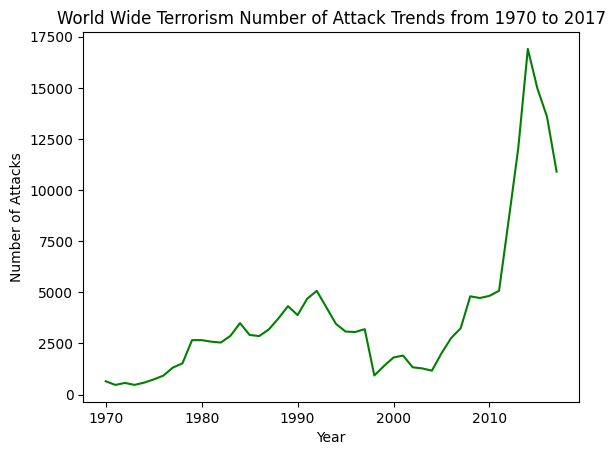

In [21]:
sns.lineplot(x="Year",y="Num of cases",data=cases_count(df,"Year"),color="green")
plt.ylabel("Number of Attacks")
plt.title("World Wide Terrorism Number of Attack Trends from 1970 to 2017")

**Geographical Analysis**

In [22]:
cases_by_country=cases_count(df,"Country").reset_index()

In [23]:
fig = px.choropleth(cases_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='Num of cases',
                    hover_name='Country',
                    projection='natural earth')

fig.show()

In [24]:
df[df['Country']=='Iraq'].Region.value_counts()


Middle East & North Africa    24636
Name: Region, dtype: int64

**Success and Impact Examination**


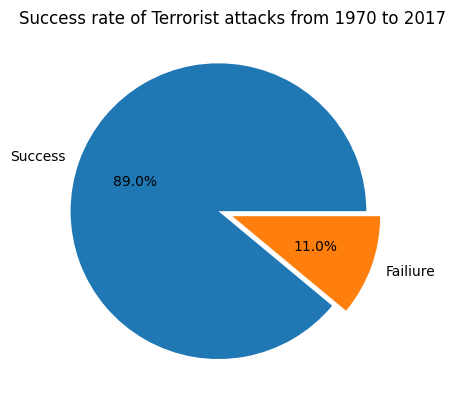

In [112]:
cases_by_success=cases_count(df,"Success")
plt.pie(cases_by_success['Num of cases'],labels=["Success","Failiure"],explode=[0.1,0],autopct="%1.1f%%")
plt.title('Success rate of Terrorist attacks from 1970 to 2017')
plt.show()

In [38]:
suc_vs_kill=cases_sum(df,"Success","Killed").reset_index()
suc_vs_wound=cases_sum(df,"Success","Wounded").reset_index()

Text(0.5, 1.0, 'Total members killed')

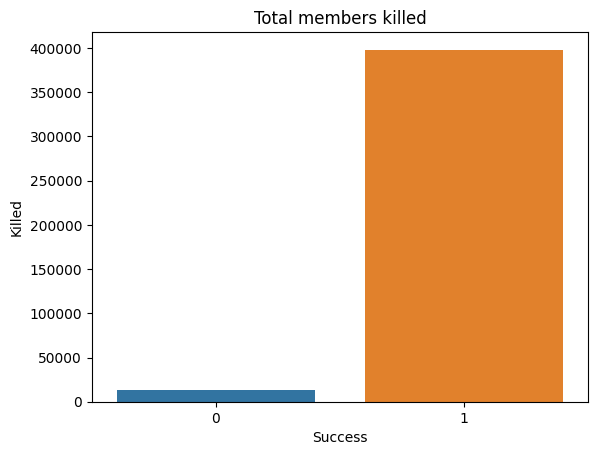

In [42]:
sns.barplot(x="Success",y="Killed",data=suc_vs_kill)
plt.title("Total members killed")

Text(0.5, 1.0, 'Total members wounded')

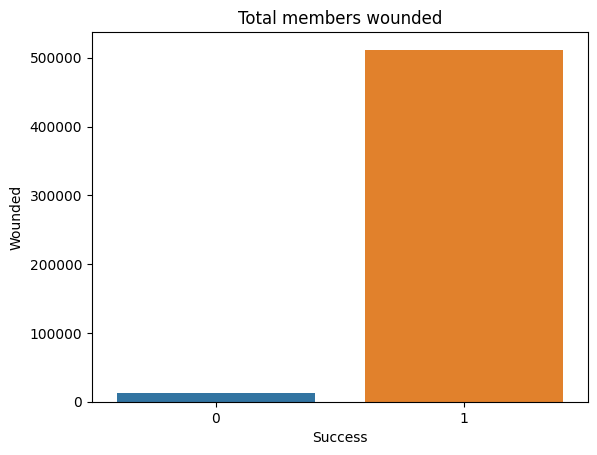

In [43]:
sns.barplot(x="Success",y="Wounded",data=suc_vs_wound)
plt.title("Total members wounded")

**Narrative Analysis**

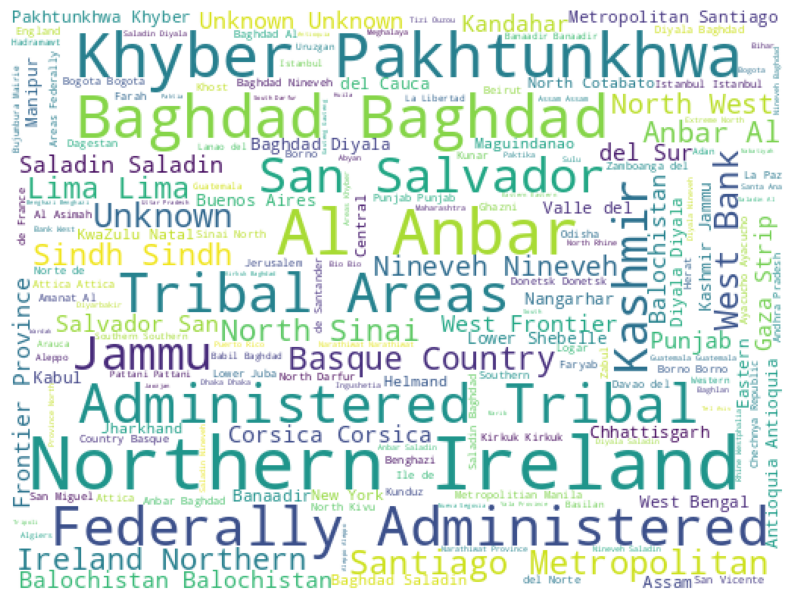

In [68]:
from wordcloud import WordCloud
from scipy import signal
cities = df["Province/State"].dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


**Regional Patterns**

Text(0.5, 1.0, 'Attacks on regions')

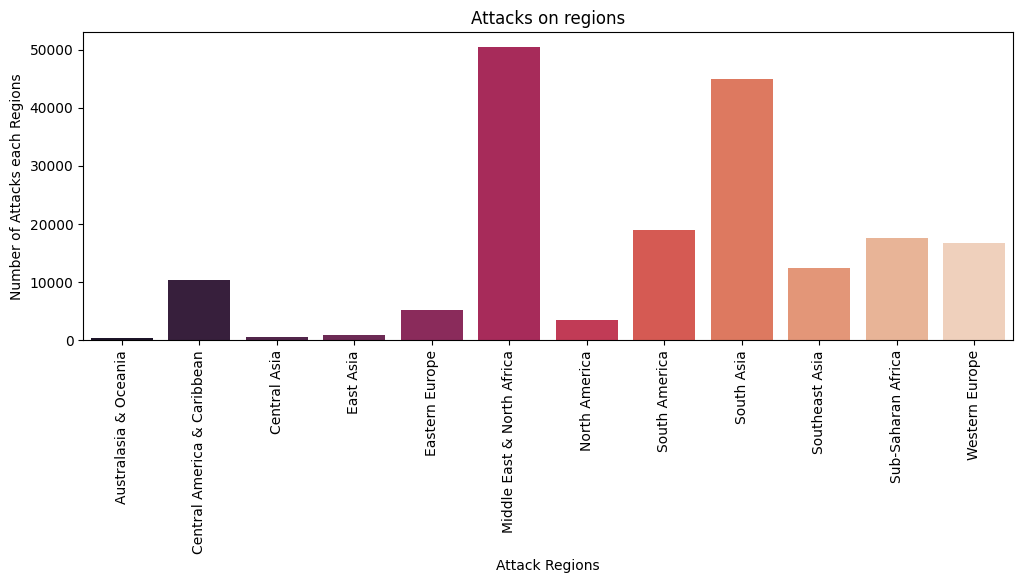

In [93]:
x_year = df['Region'].value_counts(dropna = False).sort_index().index
y_count_years = df['Region'].value_counts(dropna = False).sort_index().values
plt.figure(figsize = (12,4))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 90)
plt.xlabel('Attack Regions')
plt.ylabel('Number of Attacks each Regions')
plt.title("Attacks on regions")

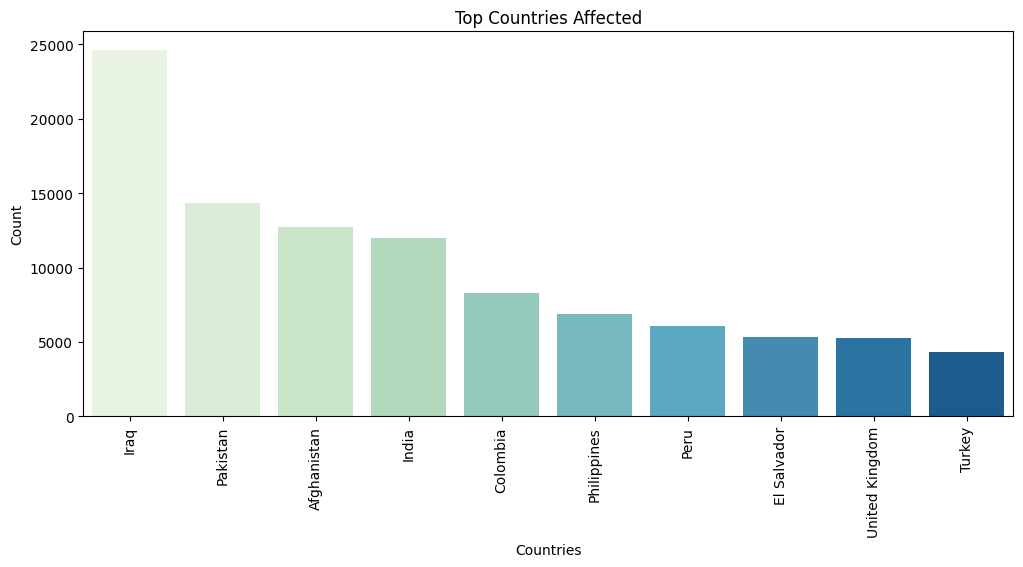

In [85]:
plt.subplots(figsize=(12,5))
top_countries = df['Country'].value_counts()[:10].to_frame().reset_index()
top_countries.columns = ['Country', 'Attacks_Count']
sns.barplot(x='Country', y='Attacks_Count', data=top_countries, palette='GnBu')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

**Target Analysis**

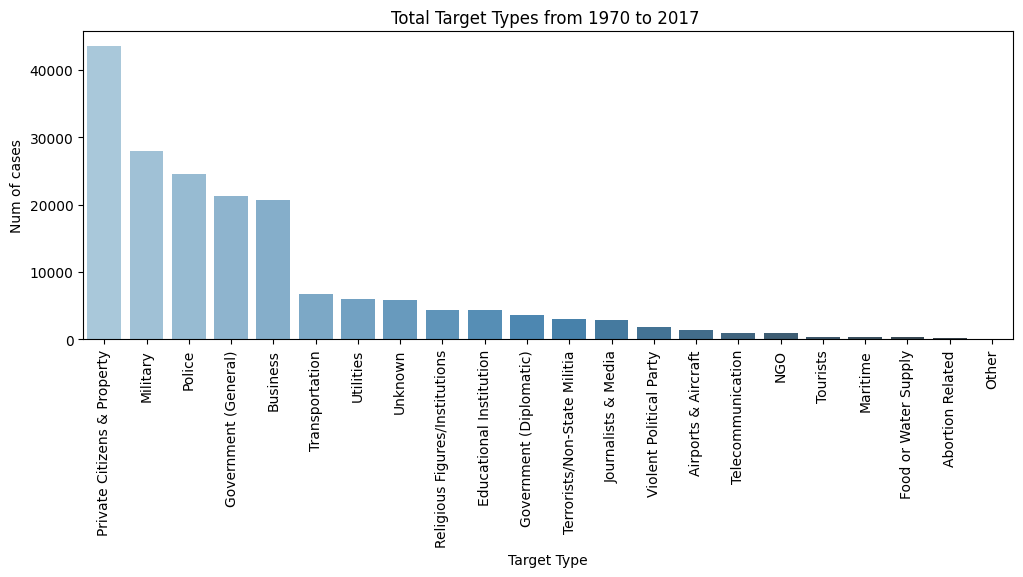

In [115]:
x=df["Target Type"].value_counts().index
y=df["Target Type"].value_counts().values
plt.figure(figsize=(12,4))
sns.barplot(x=x,y=y,palette="Blues_d")
plt.xlabel("Target Type")
plt.ylabel("Num of cases")
plt.title("Total Target Types from 1970 to 2017 ")
plt.xticks(rotation=90)
plt.show()

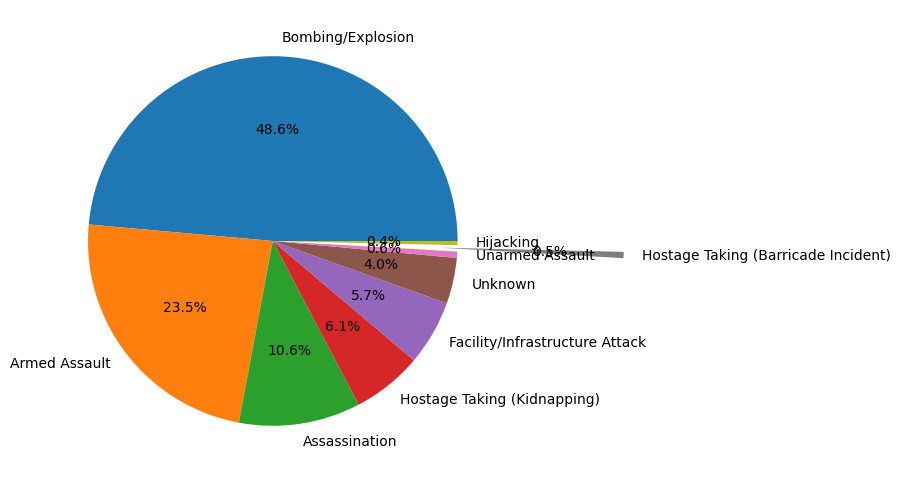

In [129]:
x=df["Attack Type"].value_counts().index
y=df["Attack Type"].value_counts().values
plt.figure(figsize=(12,6))
explode=[0,0,0,0,0,0,0,0.9,0]
plt.pie(y,labels=x,explode=explode,autopct="%1.1f%%")
plt.show()

 **Correlation between Variables**

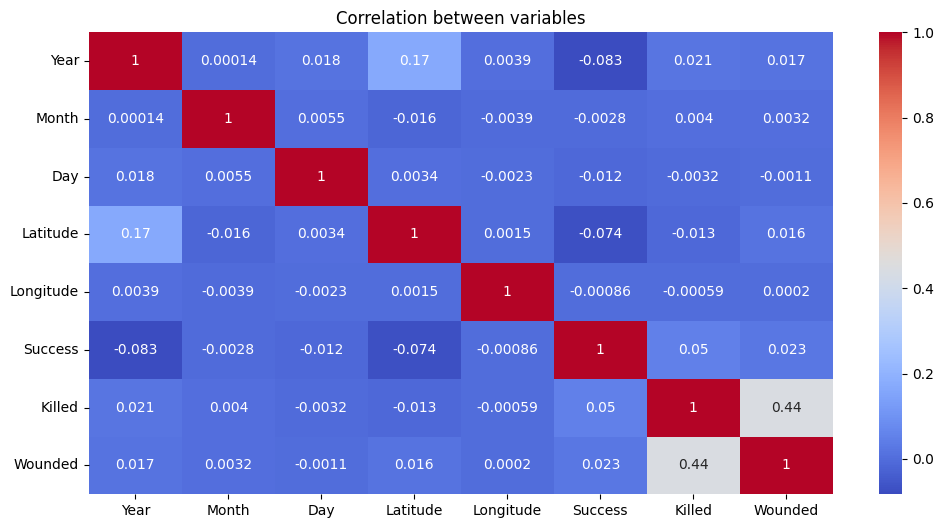

In [100]:
correlation=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between variables")
plt.show()